# Bengaluru House Price Prediction:
**Problem Statement:**
We need to predict house price in bengaluru city. For this purpose we have given collected dataset for vairous houses at different locations.

Using this dataset we need get some insights from data and develope machine learning model which will give us accurate results. And we also need to deploy that model for public use.

> Exploratory Data Analysis on raw data.

> Use feature engineering techniques to pre process given data.

> Use transformed data to predict the house prices.

> Use sutaible Machine Learning model to increase accuracy of prediction.

> Deploy the model.

## Methods:

**Data Cleaning:** 
2. Handelling Missing values.
3. Data Cleaning.
2. Check for outliers and their impact and take neccesory action.
3. Handle categorical data using encoding.
4. Apply scaling if needed.
**Machine Learning Model:**
5. Predict prices using suitable ML model and calculate accuracy of model.
6. Model Hyperparameter Tuning.
**Deployment:**
6. Deploying Final Model.

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display = "diagram")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# importing data

df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### Data Cleaning:

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
# dropping  unnecessary columns
df.drop(["availability", "society"], axis = 1, inplace = True)
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


Cheking for missing data.

In [8]:
(df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False) /len(df)*100)

balcony     4.572072
bath        0.548048
size        0.120120
location    0.007508
dtype: float64

In [9]:
# missing values are not much bigger compare to whole data set. So dropping null value rows

df = df.dropna()

df.isnull().sum(), df.shape

(area_type     0
 location      0
 size          0
 total_sqft    0
 bath          0
 balcony       0
 price         0
 dtype: int64,
 (12710, 7))

**size**

In [10]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [11]:
# we will remove BHK or Bedroom words from column and will keep numbers only

df["bhk"] = df["size"].apply( lambda x : int(x.split(" ")[0]))
df.drop(['size'], axis = 1, inplace=True)

In [12]:
df["bhk"]

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13317    2
13318    4
13319    1
Name: bhk, Length: 12710, dtype: int64

**total_sqft**

In [13]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see that some values in total-sqft column are in range and some values are in different unit also. We need solve that first.

We will take avgerage where values are in range, and we will drop values which have different unit ( meter or any other that Sq Ft)

In [14]:
def convert_data(x):
    x_new = x.split('-')
    if len(x_new) == 2:
        return (float(x_new[0]) + float(x_new[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
convert_data("12 - 15")

13.5

In [16]:
#Converting all values of Sq ft column into float

df["total_sqft"] = df["total_sqft"].apply(convert_data)
df["total_sqft"]

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12710, dtype: float64

**area_type**

In [17]:
df["area_type"].value_counts()

Super built-up  Area    8481
Built-up  Area          2310
Plot  Area              1837
Carpet  Area              82
Name: area_type, dtype: int64

We can see lot of extra spaces between words in this column. So we are removing it.

In [18]:
df["area_type"] = df["area_type"].apply( lambda x : x.strip())

In [19]:
df["area_type"] = df["area_type"].str.replace('  +', ' ')

In [20]:
df["area_type"].value_counts()

Super built-up Area    8481
Built-up Area          2310
Plot Area              1837
Carpet Area              82
Name: area_type, dtype: int64

**location**

In [21]:
# To remove extra spaces between, before and after words in column.
df["location"] = df["location"].apply( lambda x : x.strip())

In [22]:
df["location"] = df["location"].str.replace('  +', ' ')

In [23]:
location_count = (df["location"].value_counts()).sort_values(ascending = False)
location_count

Whitefield                         515
Sarjapur Road                      372
Electronic City                    302
Kanakpura Road                     261
Thanisandra                        234
                                  ... 
Hanuman Nagar                        1
Hsr layout sector3                   1
Off Bannergatta road                 1
AECS LAYOUT A-BLOCK Singasandra      1
Abshot Layout                        1
Name: location, Length: 1254, dtype: int64

In [24]:
location_count_less_10 = location_count[location_count < 10]
location_count_less_10

Ejipura                            9
Chennammana Kere                   9
Lingarajapuram                     9
Vignana Nagar                      9
Sector 1 HSR Layout                9
                                  ..
Hanuman Nagar                      1
Hsr layout sector3                 1
Off Bannergatta road               1
AECS LAYOUT A-BLOCK Singasandra    1
Abshot Layout                      1
Name: location, Length: 1007, dtype: int64

We can see that 1254 different categories present in this column but 1007 categories has very less count.

So we will mark those 1007 categories (with less than 5 count) as other...

In [25]:
df["location"] = df["location"].apply( lambda x : 'other' if x in location_count_less_10 else x)

In [26]:
# checking count

(df["location"].value_counts()).sort_values(ascending = False)

other              2639
Whitefield          515
Sarjapur Road       372
Electronic City     302
Kanakpura Road      261
                   ... 
Gunjur Palya         10
Naganathapura        10
HAL 2nd Stage        10
Ganga Nagar          10
Kalkere              10
Name: location, Length: 248, dtype: int64

Add new feature called **price per square feet**.

In [27]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

**Checking for Outlier:** 

In [28]:
# defining function to plot graph

def out_plot(column, df):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    sns.distplot(df[column])
    plt.subplot(1,2,2)
    sns.boxplot(df[column])
    plt.tight_layout()
    plt.show()
    return

In [29]:
# defining function for outlier removal using IQR and Z-score method

def IQR(column_name, df):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + (1.5*iqr)
  lower_bound = q1 - (1.5*iqr)

  # using trimming method

  df = df[(df[column_name] <= upper_bound) & (df[column_name] >= lower_bound)]
  return df

def z_score(column_name, df):
  mean = df[column_name].mean()
  std = df[column_name].std()

  upper_limit = mean + (3*std)
  lower_limit = mean - (3*std)
  df = df[(df[column_name] <= upper_limit) & (df[column_name] >= lower_limit)]
  return df

  

**bhk**

I) Unusual relation in values of column size and column total_sqft.

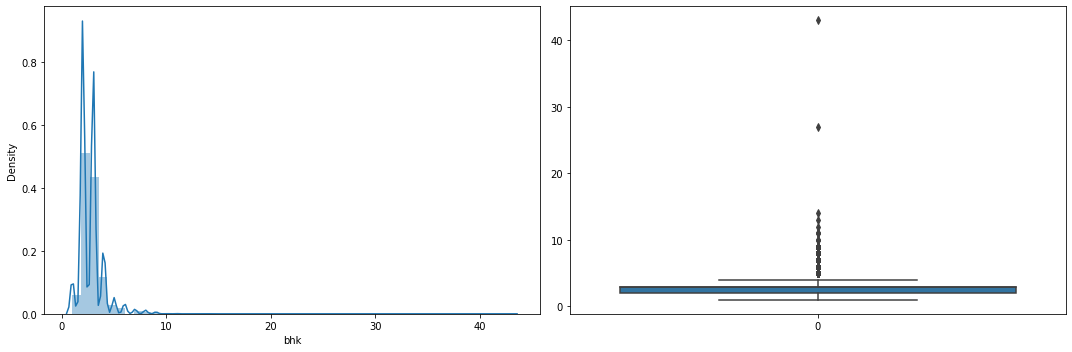

(12710, 8)

In [30]:
out_plot("bhk", df)
df.shape

In [31]:
df[df["bhk"] >= 10]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
459,Super built-up Area,other,5000.0,9.0,3.0,360.0,11,7200.000000
1718,Super built-up Area,other,8000.0,27.0,0.0,230.0,27,2875.000000
1768,Plot Area,other,1200.0,11.0,0.0,170.0,11,14166.666667
3853,Plot Area,other,1200.0,6.0,3.0,150.0,11,12500.000000
4684,Plot Area,Munnekollal,2400.0,40.0,0.0,660.0,43,27500.000000
4916,Super built-up Area,other,1250.0,15.0,0.0,125.0,14,10000.000000
6533,Plot Area,Mysore Road,2232.0,6.0,2.0,300.0,12,13440.860215
9511,Plot Area,Munnekollal,1200.0,8.0,3.0,230.0,10,19166.666667
9935,Super built-up Area,other,5425.0,13.0,0.0,275.0,13,5069.124424
11142,Built-up Area,Munnekollal,7200.0,10.0,3.0,200.0,10,2777.777778


From above table we can see that 2400 SqFt house has 43 bedrooms which is not feasible.

Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

So we will assume that avg value of 1bhk should be greater than 300 SqFt

In [32]:
# removing unusual data

df = df[~(df["total_sqft"] / df["bhk"] < 300)]

df.shape

(12055, 8)

In [33]:
# unusual values are deleted from data
df[df["bhk"] >= 10]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
459,Super built-up Area,other,5000.0,9.0,3.0,360.0,11,7200.000000
9935,Super built-up Area,other,5425.0,13.0,0.0,275.0,13,5069.124424
11142,Built-up Area,Munnekollal,7200.0,10.0,3.0,200.0,10,2777.777778
11327,Plot Area,Kogilu,3280.0,9.0,3.0,450.0,10,13719.512195



Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

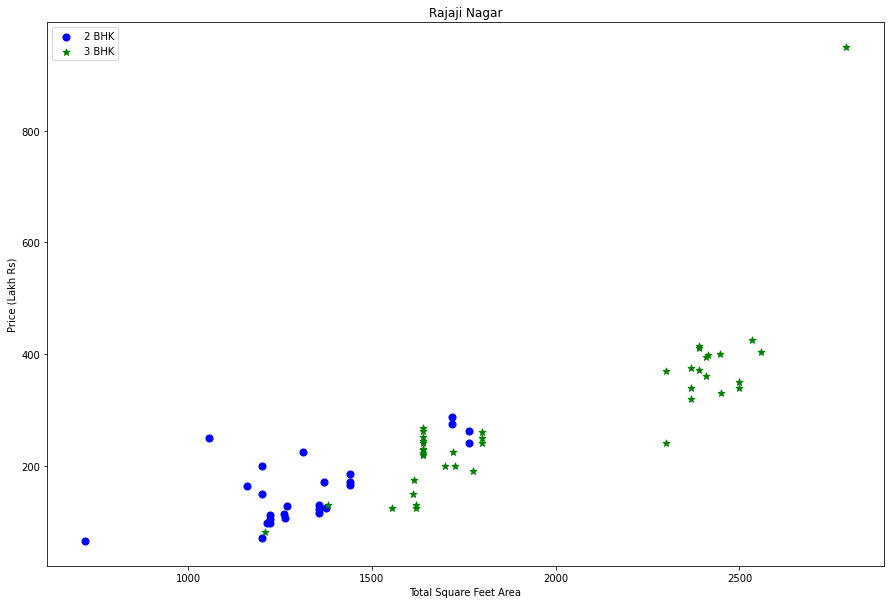

In [34]:
%matplotlib inline
import matplotlib

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Rs)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

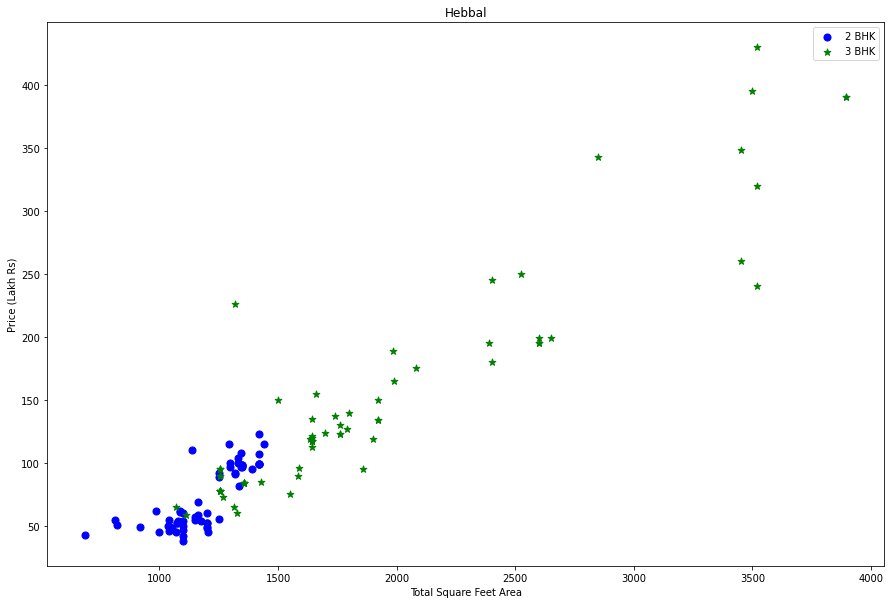

In [35]:
plot_scatter_chart(df,"Hebbal")

We should also remove properties where for same location, the price of 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location.

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = remove_bhk_outliers(df)

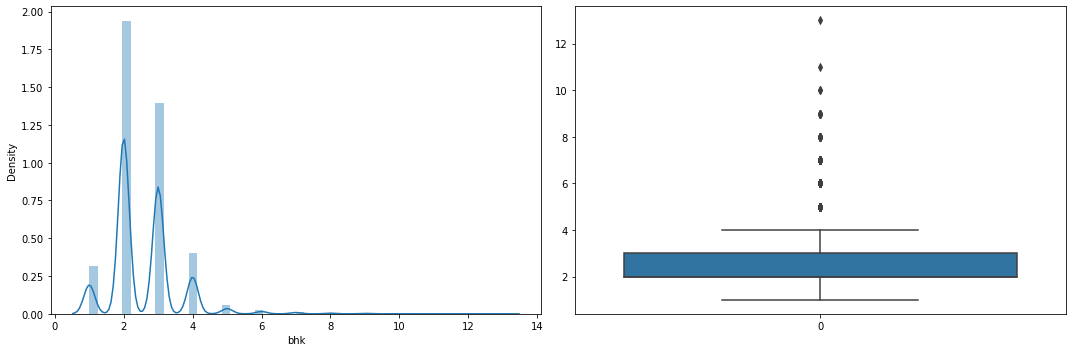

(8417, 8)

In [37]:
out_plot("bhk", df)
df.shape

**bath**

II) We can see unusual relation in data between bath and size columns.

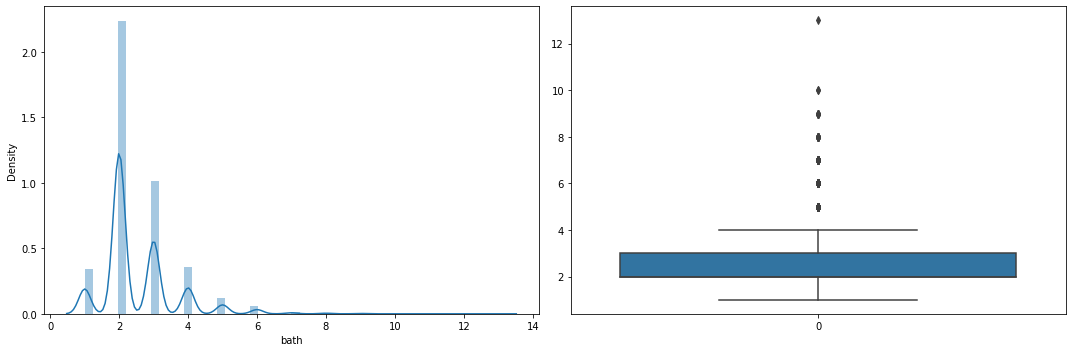

In [38]:
out_plot("bath", df)

In [39]:
df[df["bath"] > df["bhk"]+2]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
6838,Super built-up Area,Rajaji Nagar,7500.0,8.0,3.0,1700.0,5,22666.666667
7709,Built-up Area,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
9974,Plot Area,other,2400.0,6.0,2.0,775.0,3,32291.666667
12103,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330


Let's suppose that we have a 2bhk house with 5 bathrooms, or we can see that we have 3bhk house with 6 bathrooms.

Its very unusual.

total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [40]:
# deleting these outliers

df = df[~ (df["bath"] > df["bhk"]+1)]
df.shape

(8306, 8)

**total_sqft**

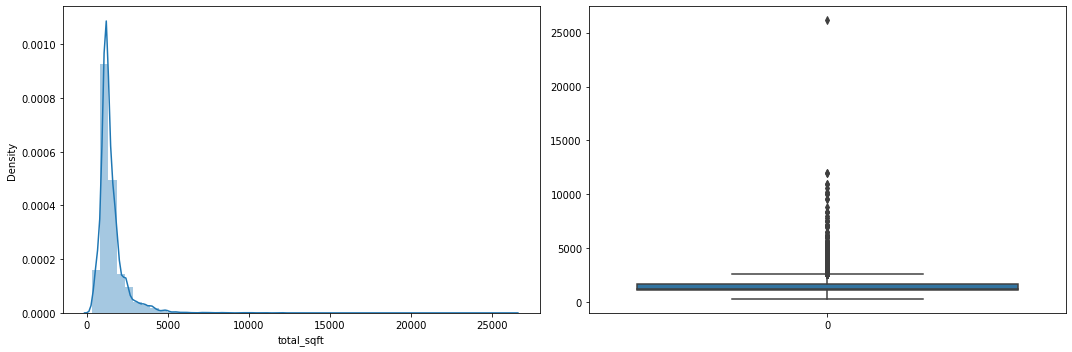

In [41]:
out_plot("total_sqft", df)

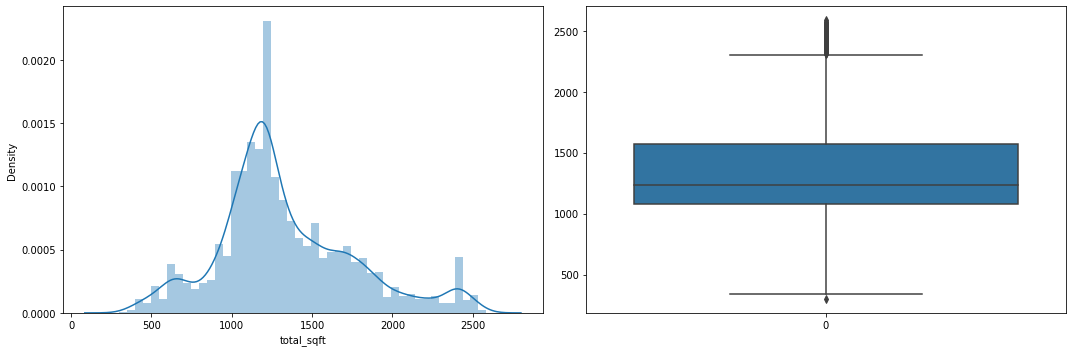

(7653, 8)

In [42]:
# As it is skewed data we will use IQR method to remove outliers

df = IQR("total_sqft", df)
out_plot("total_sqft", df)
df.shape

**price**

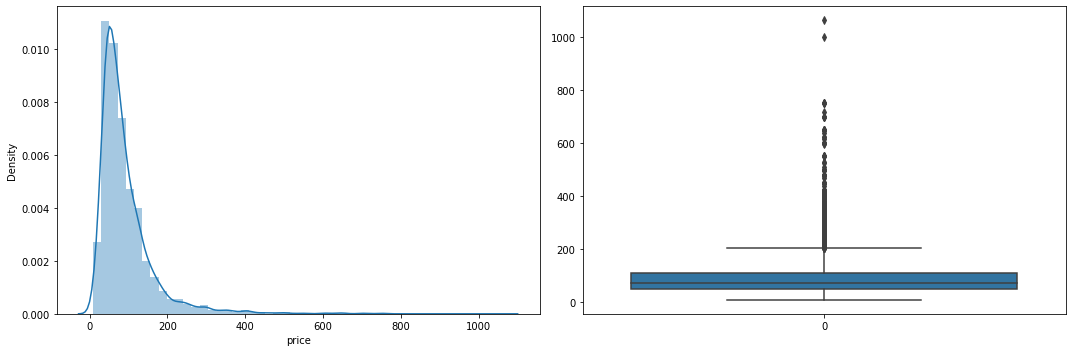

In [43]:
out_plot("price", df)

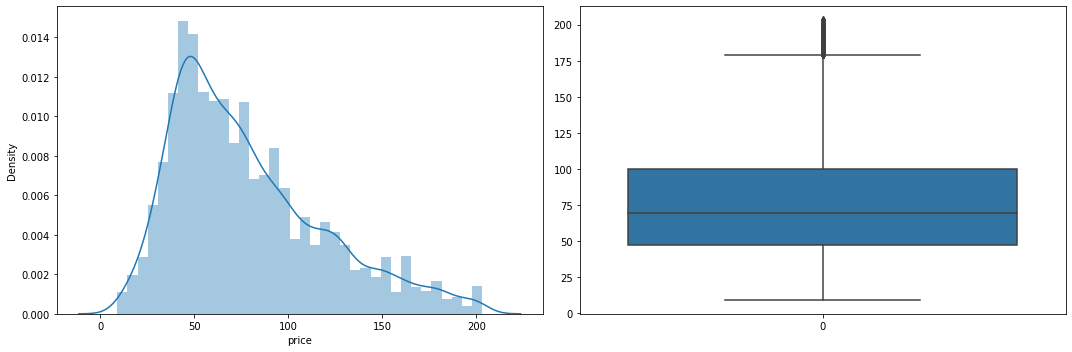

(7212, 8)

In [44]:
# As it is skewed data we will use IQR method to remove outliers

df = IQR("price", df)
out_plot("price", df)
df.shape

**Price per sqft**

In [45]:
df.price_per_sqft.describe()

count     7212.000000
mean      5926.092539
std       2264.462040
min        500.000000
25%       4400.000000
50%       5581.395349
75%       6842.222955
max      24166.666667
Name: price_per_sqft, dtype: float64

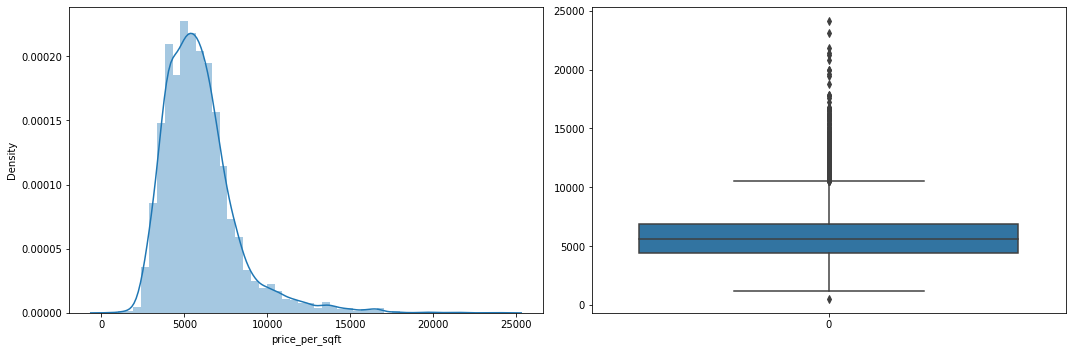

In [46]:
out_plot("price_per_sqft", df)

Here we find that min price per sqft is 500 rs/sqft whereas max is 24166, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [47]:
def pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = pps_outliers(df)
df.shape


(5409, 8)

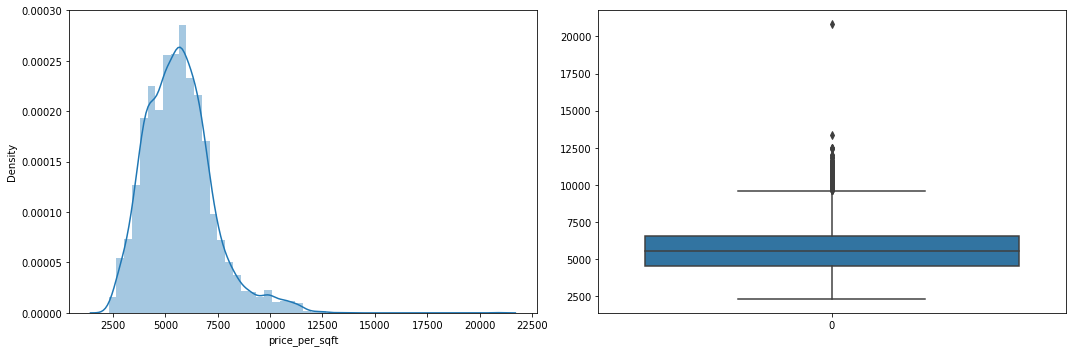

In [48]:
out_plot("price_per_sqft", df)

**balcony**

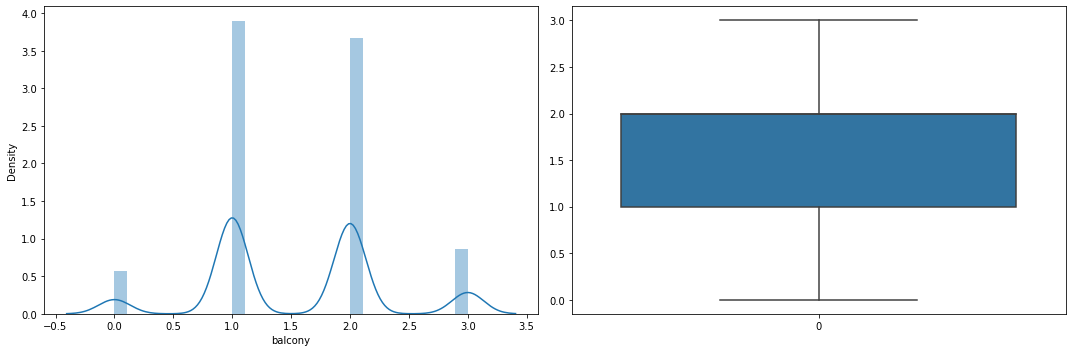

In [49]:
out_plot("balcony",df)


Showing no outliers in balcony column

Now we will check relation of each column with price of house

<AxesSubplot:>

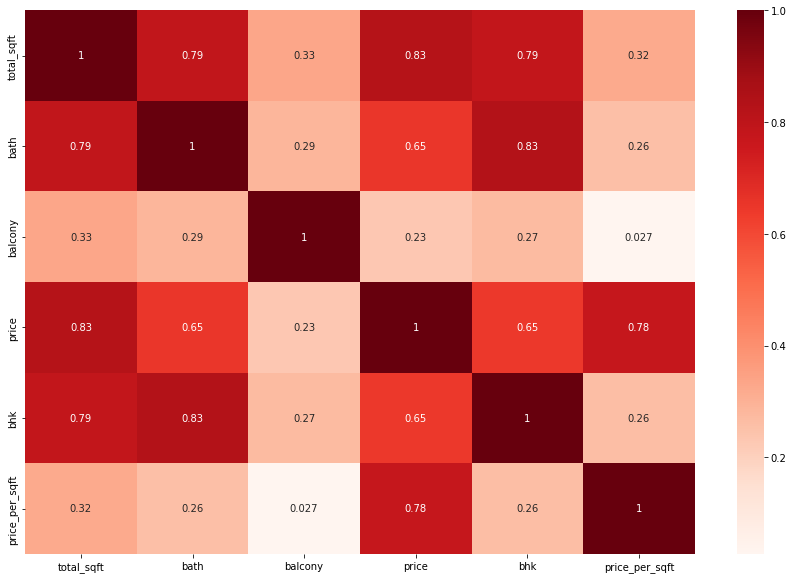

In [50]:
cor=df.corr()
sns.heatmap(cor, annot = True, cmap='Reds')

From this heatmap we can see that columns: size, total_sqft and bath are much more relative to price..

1. But balcony column showing less relation with price.

2. Bath column has much more corelation with size column.

So we can drop balcony & bath columns.

We will also drop price per sqft column as we have no use of it further.

In [51]:
df.drop(["balcony", "price_per_sqft", "bath"], axis = 1, inplace = True)

<AxesSubplot:>

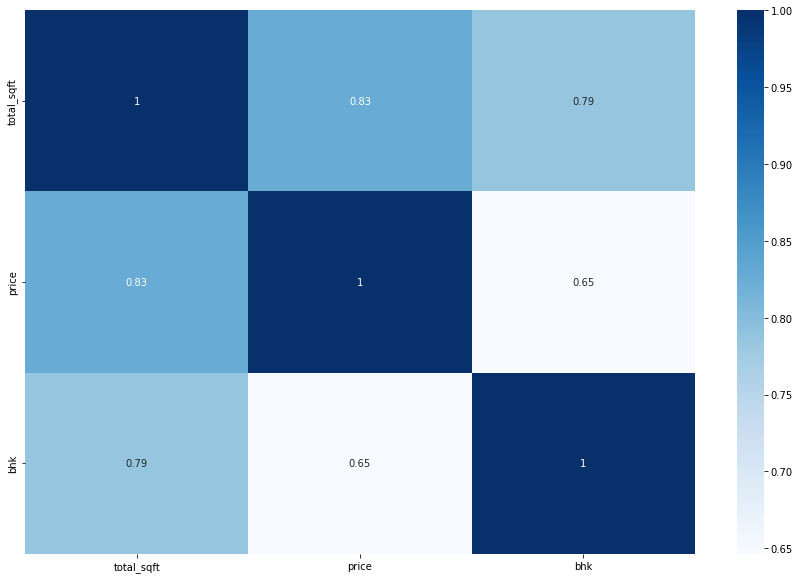

In [52]:
cor=df.corr()
sns.heatmap(cor, annot = True, cmap='Blues')

In [53]:
df.head()

,area_type,location,total_sqft,price,bhk
0,Super built-up Area,1st Block Jayanagar,1630.0,194.0,3
1,Built-up Area,1st Block Jayanagar,1200.0,130.0,3
2,Super built-up Area,1st Block Jayanagar,1235.0,148.0,2
3,Built-up Area,1st Block Koramangala,860.0,65.5,2
4,Super built-up Area,1st Block Koramangala,1000.0,45.0,2


Data Transformation

In [54]:
# seperating target column and input features

x = df.drop(["price"], axis = 1)

y = df["price"]

In [55]:
x.head()

,area_type,location,total_sqft,bhk
0,Super built-up Area,1st Block Jayanagar,1630.0,3
1,Built-up Area,1st Block Jayanagar,1200.0,3
2,Super built-up Area,1st Block Jayanagar,1235.0,2
3,Built-up Area,1st Block Koramangala,860.0,2
4,Super built-up Area,1st Block Koramangala,1000.0,2


In [56]:
# seperating x into categorical column and numerical columns

cat_col = [col for col in x.columns if x[col].dtype == "object"]

num_col = [col for col in x.columns if x[col].dtype != "object"]

cat_col, num_col

(['area_type', 'location'], ['total_sqft', 'bhk'])

In [57]:
# seperate validation data from training data

x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size = 0.80, random_state = 42)

print(f'Shape of x_train -: {x_train.shape}')
print(f'Shape of x_valid -: {x_valid.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_valid -: {y_valid.shape}')

Shape of x_train -: (4327, 4)
Shape of x_valid -: (1082, 4)
Shape of y_train -: (4327,)
Shape of y_valid -: (1082,)


Encoding categorical columns

Checking categories in x_train and in x_valid are same or not.

In [58]:
set(x_train["area_type"]) == set(x_valid["area_type"])

True

In [59]:
set(x_train["location"]) == set(x_valid["location"])

False

As categories are not same we can't use label encoding. 

In location column have 337 different categories so we can't use One Hot Encoder on location column.

So we are using Ordinal Encoder with all unknown categories in validation set will be set to specific number (i.e. -99)

In [60]:
# encoding

ct_encoding = ColumnTransformer([("ord_encd", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -99),
                                  [0,1])],remainder = "passthrough")

In [61]:
# Scaling

ct_scaling = ColumnTransformer([("Std_Scale", StandardScaler(), [0,1,2,3])])

In [62]:
# creating pipeline

pipe = Pipeline([('Encoding', ct_encoding), ('scaling', ct_scaling)])
pipe

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_encd',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-99),
                                                  [0, 1])])),
                ('scaling',
                 ColumnTransformer(transformers=[('Std_Scale', StandardScaler(),
                                                  [0, 1, 2, 3])]))])

In [63]:
x_train_scaled = pd.DataFrame(pipe.fit_transform(x_train), columns = x_train.columns)

In [64]:
x_valid_scaled = pd.DataFrame(pipe.transform(x_valid), columns = x_valid.columns )

### Creating ML Model:

In [65]:
model_lr = LinearRegression()

In [66]:
model_xgb = xgb.XGBRegressor(booster = 'gbtree', n_estimators = 100, max_depth = 6, eval_metric = 'rmse')

In [67]:
model_rfr = RandomForestRegressor(n_estimators = 100)

In [68]:
model_ridge = Ridge(alpha = 1)

In [69]:
models = {'Linear Regression' : model_lr, 'XGB Regressor' : model_xgb,
          'Random Forest Regressor' : model_rfr, 'Ridge Regression' : model_ridge}

Now we will check **accuracy for each model on training and testing dataset.**

In [70]:
def model_score(model, x_train, y_train, x_valid, y_valid):
    model.fit(x_train, y_train)
    y_preds= model.predict(x_valid)
    mse = mean_squared_error(y_valid, y_preds)
    return model.score(x_train, y_train), model.score(x_valid, y_valid), mse, np.sqrt(mse)

In [71]:
acc_train = []
acc_valid = []
mse = []
rmse = []

for key,value in models.items():
    acc_tr, acc_vd, mse_scr, rmse_scr = model_score(value, x_train_scaled, y_train, x_valid_scaled, y_valid)
    acc_train.append(acc_tr)
    acc_valid.append(acc_vd)
    mse.append(mse_scr)
    rmse.append(rmse_scr)
    
acc_data = pd.DataFrame({'Model' : models.keys(), 'Training Score' : acc_train, 'Validation Score' : acc_valid, 
                        'MSE' : mse, 'RMSE' : rmse})
acc_data

,Model,Training Score,Validation Score,MSE,RMSE
0,Linear Regression,0.699703,0.686155,386.448605,19.658296
1,XGB Regressor,0.955551,0.877602,150.712893,12.276518
2,Random Forest Regressor,0.961891,0.807296,237.284240,15.404033
3,Ridge Regression,0.699703,0.686184,386.413857,19.657412


Model Selection:

---


From above results we are selecting **xgb regressor** as our final model.

**Hyperparameter tuning:**

First we will see feature importance for this model.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

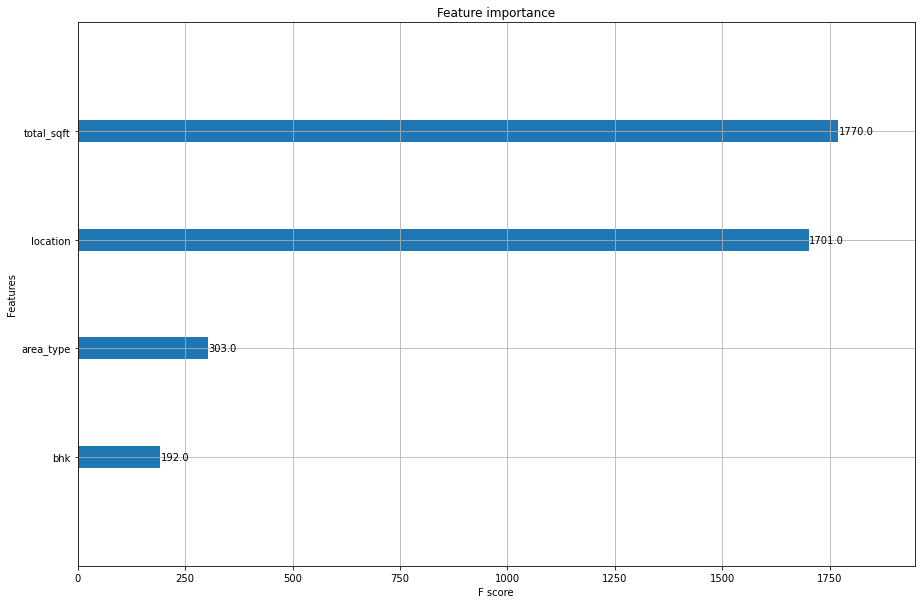

In [72]:
xgb.plot_importance(model_xgb)

**Final Model:**
XGB Regressor with hyper parameters find out using grid search cv is our final model.

In [73]:
final_model = xgb.XGBRegressor(booster = 'gbtree', max_depth=3, n_estimators=500, alpha = 0.1, eta = 0.01, 
                            reg_lambda = 0, gamma = 1, eval_metric = 'rmse', random_state=42)

In [74]:
final_model.fit(x_train_scaled, y_train)

y_preds = final_model.predict(x_valid_scaled)

print("Training Score:",final_model.score(x_train_scaled, y_train))
print("Testing Score:",final_model.score(x_valid_scaled, y_valid))
print("MSE:",mean_squared_error(y_valid, y_preds))

Training Score: 0.7868037270990109
Testing Score: 0.7761545386636717
MSE: 275.629298615652


In [75]:
# predicted prices vs actual prices
pd.Series(y_preds).head(), y_valid.head()

(0    109.715317
 1    151.260925
 2     54.077641
 3     51.217545
 4     60.305668
 dtype: float32,
 5041    150.00
 2407    149.00
 3589     45.79
 381      55.00
 3098     75.00
 Name: price, dtype: float64)

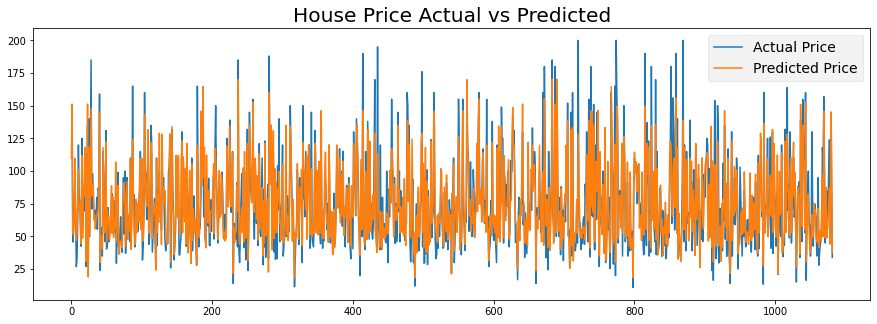

In [76]:
df_valid = pd.DataFrame(y_valid).reset_index()
df_valid['prediction'] = pd.Series(y_preds)
df_valid["price"].plot(figsize = (15,5))
df_valid['prediction'].plot(figsize = (15,5))
plt.style.use('fivethirtyeight')
plt.legend(['Actual Price', 'Predicted Price'])
plt.title("House Price Actual vs Predicted")
plt.show()

**So here we are getting 87.22 % of accuracy on our xgboost regression model.**

### Model Deployment:

In [77]:
final_pipe = Pipeline([('Encoding', ct_encoding), ('scaling', ct_scaling), ('Model', final_model)])

In [78]:
final_pipe.fit(x_train, y_train)

y_pred = final_pipe.predict(x_valid)

In [79]:
a = pd.DataFrame(x_valid.iloc[1]).T
a.reset_index(drop = True, inplace = True)
a

,area_type,location,total_sqft,bhk
0,Plot Area,Jigani,2400.0,3


In [80]:
final_pipe.predict(a)

array([151.26093], dtype=float32)

In [81]:
# defining function for prediction

def price_prediction(area_type, location, bhk, sqft):
    
    d = {"area_type" : [area_type], "location" : [location], "bhk" : [bhk], "total_sqft" : [sqft]}
    
    data = pd.DataFrame(d)
    
    return final_pipe.predict(data)[0]

In [82]:
price_prediction('Plot Area','other',3,1200.0)

99.361176

In [83]:
price_prediction('Super built-up Area', 'Whitefield', 2, 805.0)

43.939175

**Export the tested model to a pickle file**

wb : write binary

In [84]:
import pickle
with open("Bengaluru_House_Price_model.pickle", 'wb') as f:
    pickle.dump(final_pipe, f)

In [85]:
x.columns

Index(['area_type', 'location', 'total_sqft', 'bhk'], dtype='object')

Export location and column information to a file that will be useful later on in our prediction application.


json : java script object notation

text format

In [86]:
import json
columns = { 'data_columns' : [col.lower() for col in x.columns] }
with open("columns.json", 'w') as f:
    f.write(json.dumps(columns))

Checking pickle file is predicting or not

In [87]:

pickled_model = pickle.load(open("Bengaluru_House_Price_model.pickle", 'rb'))

In [119]:
columns = json.load(open("columns.json",'rb'))["data_columns"]

In [122]:
# predictions

pickled_model.predict(pd.DataFrame([['Super built-up Area', 'Whitefield', 2, 805.0]], columns = columns))[0]

33.654064